## Cosine prediction

### Data prepare
In this notebook, we will using fost to predict a cosine curve, let's import `pandas` and `numpy` first.

In [1]:
import pandas as pd
import numpy as np

Next, generate cosine data.

In [19]:
train_df = pd.DataFrame()
#we don't have actual timestamp in this case, use a default one
train_df['Date'] = [pd.datetime(year=2000,month=1,day=1)+pd.Timedelta(days=i) for i in range(2000)] 
train_df['TARGET'] = [np.cos(i/2) for i in range(2000)]
#there is not a 'Node' concept in this dataset, thus all the Node are 0
train_df.loc[:, 'Node'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


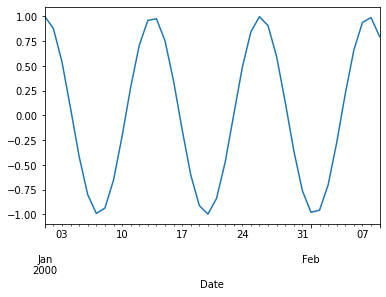

In [29]:
#show first 40 data
train_df.iloc[:40].set_index('Date')['TARGET'].plot()

FOST only support file path as input, save the data to `train.csv`

In [20]:
train_df.to_csv('train.csv',index=False)

### Load fost to predict future

In [5]:
import fostool
from fostool.pipeline import Pipeline

In [30]:
#predict future 10 steps
lookahead = 10
fost = Pipeline(lookahead=lookahead, train_path='train.csv', config_path='src/config/default.yaml')

2021-11-08 09:46:43 fostool/task/config_handler.py 26 \ - INFO - yaml handler load path: /root/HierST/src/config/default.yaml
2021-11-08 09:46:43 fostool/dataset/data_utils.py 402 \ - INFO - Detected Sample Frequency: <Day>.
2021-11-08 09:46:43 fostool/dataset/data_utils.py 426 \ - INFO - 2000 Rows Before Time Reindex.
2021-11-08 09:46:43 fostool/dataset/data_utils.py 428 \ - INFO - 2000 Rows After Time Reindex.
2021-11-08 09:46:43 fostool/dataset/data_utils.py 429 \ - INFO - --------------------
2021-11-08 09:46:43 fostool/dataset/data_utils.py 457 \ - INFO - 2000 Rows Before Fill Missing.
2021-11-08 09:46:43 fostool/dataset/data_utils.py 461 \ - INFO - 2000 Rows After Fill Missing.
2021-11-08 09:46:43 fostool/dataset/data_utils.py 462 \ - INFO - --------------------


In [31]:
#fit in one line
fost.fit()

2021-11-08 09:46:59 fostool/tools/trainer.py 129 \ - INFO - On epoch 0, train loss 0.9837532142798106, val loss 1.1207878589630127
2021-11-08 09:46:59 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:46:59 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_290a_10, current best val loss 1.1207878589630127
2021-11-08 09:46:59 fostool/tools/trainer.py 129 \ - INFO - On epoch 1, train loss 0.8563873469829559, val loss 1.0255659818649292
2021-11-08 09:46:59 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:46:59 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_290a_10, current best val loss 1.0255659818649292
2021-11-08 09:46:59 fostool/tools/trainer.py 129 \ - INFO - On epoch 2, train loss 0.7682058115800222, val loss 0.9656972289085388
2021-11-08 09:46:59 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:46:59 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_290a_10, current best val loss 0.965697228908538

2021-11-08 09:47:02 fostool/tools/trainer.py 129 \ - INFO - On epoch 27, train loss 0.0007021018924812475, val loss 0.0003066306817345321
2021-11-08 09:47:02 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:02 fostool/tools/trainer.py 129 \ - INFO - On epoch 28, train loss 0.0007906443012567858, val loss 9.11616298253648e-05
2021-11-08 09:47:02 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:02 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_290a_10, current best val loss 9.11616298253648e-05
2021-11-08 09:47:02 fostool/tools/trainer.py 129 \ - INFO - On epoch 29, train loss 0.0005445698382876193, val loss 0.00014191849913913757
2021-11-08 09:47:02 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:02 fostool/tools/trainer.py 129 \ - INFO - On epoch 30, train loss 0.0005383791770630827, val loss 0.00014290313993114978
2021-11-08 09:47:02 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:02 fos

2021-11-08 09:47:06 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:06 fostool/tools/trainer.py 129 \ - INFO - On epoch 62, train loss 0.0003405533085848826, val loss 0.00014239524898584932
2021-11-08 09:47:06 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:06 fostool/tools/trainer.py 129 \ - INFO - On epoch 63, train loss 0.0004341539194380554, val loss 0.0007651319610886276
2021-11-08 09:47:06 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:06 fostool/tools/trainer.py 129 \ - INFO - On epoch 0, train loss 0.9101146658261617, val loss 0.734132707118988
2021-11-08 09:47:06 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:06 fostool/tools/trainer.py 137 \ - INFO - For model SandwichModel_3c13_10, current best val loss 0.734132707118988
2021-11-08 09:47:06 fostool/tools/trainer.py 129 \ - INFO - On epoch 1, train loss 0.6899108191331228, val loss 0.6729809641838074
2021-11-08 09:47:06 fostool/tools/tra

2021-11-08 09:47:12 fostool/tools/trainer.py 137 \ - INFO - For model MLP_Res_6635_10, current best val loss 0.2936961054801941
2021-11-08 09:47:12 fostool/tools/trainer.py 129 \ - INFO - On epoch 1, train loss 0.15311602192620435, val loss 0.07392895966768265
2021-11-08 09:47:12 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:12 fostool/tools/trainer.py 137 \ - INFO - For model MLP_Res_6635_10, current best val loss 0.07392895966768265
2021-11-08 09:47:12 fostool/tools/trainer.py 129 \ - INFO - On epoch 2, train loss 0.030412248335778713, val loss 0.035870201885700226
2021-11-08 09:47:12 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:12 fostool/tools/trainer.py 137 \ - INFO - For model MLP_Res_6635_10, current best val loss 0.035870201885700226
2021-11-08 09:47:12 fostool/tools/trainer.py 129 \ - INFO - On epoch 3, train loss 0.04199566412717104, val loss 0.020081346854567528
2021-11-08 09:47:12 fostool/tools/trainer.py 130 \ - INFO - -----

2021-11-08 09:47:14 fostool/tools/trainer.py 129 \ - INFO - On epoch 31, train loss 0.0002673432172741741, val loss 0.0003001865989062935
2021-11-08 09:47:14 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:14 fostool/tools/trainer.py 129 \ - INFO - On epoch 32, train loss 0.00026371441830027226, val loss 0.00026390934363007545
2021-11-08 09:47:14 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:15 fostool/tools/trainer.py 129 \ - INFO - On epoch 33, train loss 0.00023685571674529152, val loss 0.00021001645654905587
2021-11-08 09:47:15 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:15 fostool/tools/trainer.py 137 \ - INFO - For model MLP_Res_6635_10, current best val loss 0.00021001645654905587
2021-11-08 09:47:15 fostool/tools/trainer.py 129 \ - INFO - On epoch 34, train loss 0.00023485481748745465, val loss 0.0002046708104899153
2021-11-08 09:47:15 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:15

2021-11-08 09:47:17 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:17 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_3bf8_20, current best val loss 0.8812853097915649
2021-11-08 09:47:17 fostool/tools/trainer.py 129 \ - INFO - On epoch 3, train loss 0.7067542672157288, val loss 0.6962380409240723
2021-11-08 09:47:17 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:17 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_3bf8_20, current best val loss 0.6962380409240723
2021-11-08 09:47:18 fostool/tools/trainer.py 129 \ - INFO - On epoch 4, train loss 0.5370586887001991, val loss 0.4418054521083832
2021-11-08 09:47:18 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:18 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_3bf8_20, current best val loss 0.4418054521083832
2021-11-08 09:47:18 fostool/tools/trainer.py 129 \ - INFO - On epoch 5, train loss 0.3624854627996683, val loss 0.241090103983879

2021-11-08 09:47:21 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_3bf8_20, current best val loss 0.0002890834293793887
2021-11-08 09:47:22 fostool/tools/trainer.py 129 \ - INFO - On epoch 28, train loss 0.00022267504937190097, val loss 0.0002814803447108716
2021-11-08 09:47:22 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:22 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_3bf8_20, current best val loss 0.0002814803447108716
2021-11-08 09:47:22 fostool/tools/trainer.py 129 \ - INFO - On epoch 29, train loss 0.0002013488829106791, val loss 0.0002352254232391715
2021-11-08 09:47:22 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:22 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_3bf8_20, current best val loss 0.0002352254232391715
2021-11-08 09:47:22 fostool/tools/trainer.py 129 \ - INFO - On epoch 30, train loss 0.00018940978407044895, val loss 0.00026383966905996203
2021-11-08 09:47:22 fostool/tools/trai

2021-11-08 09:47:26 fostool/tools/trainer.py 129 \ - INFO - On epoch 58, train loss 9.59769158725976e-05, val loss 5.5616572353756055e-05
2021-11-08 09:47:26 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:26 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_3bf8_20, current best val loss 5.5616572353756055e-05
2021-11-08 09:47:26 fostool/tools/trainer.py 129 \ - INFO - On epoch 59, train loss 7.876578956711455e-05, val loss 6.85606719343923e-05
2021-11-08 09:47:26 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:27 fostool/tools/trainer.py 129 \ - INFO - On epoch 60, train loss 7.090707094903337e-05, val loss 0.0001098440625355579
2021-11-08 09:47:27 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:27 fostool/tools/trainer.py 129 \ - INFO - On epoch 61, train loss 6.597221636184258e-05, val loss 4.8209749365923926e-05
2021-11-08 09:47:27 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:27 fo

2021-11-08 09:47:33 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:33 fostool/tools/trainer.py 129 \ - INFO - On epoch 15, train loss 0.000460846844362095, val loss 0.00014494317292701453
2021-11-08 09:47:33 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:33 fostool/tools/trainer.py 137 \ - INFO - For model SandwichModel_51d8_20, current best val loss 0.00014494317292701453
2021-11-08 09:47:34 fostool/tools/trainer.py 129 \ - INFO - On epoch 16, train loss 0.00038144743302837014, val loss 0.00021717474737670273
2021-11-08 09:47:34 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:34 fostool/tools/trainer.py 129 \ - INFO - On epoch 17, train loss 0.00032546600232308265, val loss 8.469899330521002e-05
2021-11-08 09:47:34 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:34 fostool/tools/trainer.py 137 \ - INFO - For model SandwichModel_51d8_20, current best val loss 8.469899330521002e-05
2021-11-08 09:47

2021-11-08 09:47:40 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:40 fostool/tools/trainer.py 129 \ - INFO - On epoch 14, train loss 0.00016771475020505022, val loss 0.00017033301992341876
2021-11-08 09:47:40 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:40 fostool/tools/trainer.py 129 \ - INFO - On epoch 15, train loss 0.00015744993106636684, val loss 0.00019818334840238094
2021-11-08 09:47:40 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:40 fostool/tools/trainer.py 129 \ - INFO - On epoch 16, train loss 0.0001483459691371536, val loss 0.00019518610497470945
2021-11-08 09:47:40 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:40 fostool/tools/trainer.py 129 \ - INFO - On epoch 17, train loss 0.00013549456707551144, val loss 0.00015678144700359553
2021-11-08 09:47:40 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:40 fostool/tools/trainer.py 137 \ - INFO - For model MLP_Re

2021-11-08 09:47:44 fostool/tools/trainer.py 129 \ - INFO - On epoch 1, train loss 0.9476401589133523, val loss 0.8647940754890442
2021-11-08 09:47:44 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:44 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_d82f_30, current best val loss 0.8647940754890442
2021-11-08 09:47:44 fostool/tools/trainer.py 129 \ - INFO - On epoch 2, train loss 0.8418646021322771, val loss 0.8006345629692078
2021-11-08 09:47:44 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:44 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_d82f_30, current best val loss 0.8006345629692078
2021-11-08 09:47:44 fostool/tools/trainer.py 129 \ - INFO - On epoch 3, train loss 0.7003533894365485, val loss 0.568802535533905
2021-11-08 09:47:44 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:44 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_d82f_30, current best val loss 0.568802535533905


2021-11-08 09:47:53 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:53 fostool/tools/trainer.py 137 \ - INFO - For model KRNNModel_d82f_30, current best val loss 4.878137769992463e-05
2021-11-08 09:47:53 fostool/tools/trainer.py 129 \ - INFO - On epoch 30, train loss 0.00023417103379456833, val loss 6.631559517700225e-05
2021-11-08 09:47:53 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:53 fostool/tools/trainer.py 129 \ - INFO - On epoch 31, train loss 0.00022525229856414214, val loss 0.00011550372437341139
2021-11-08 09:47:53 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:54 fostool/tools/trainer.py 129 \ - INFO - On epoch 32, train loss 0.00021706995109773496, val loss 0.00010663629655027762
2021-11-08 09:47:54 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:47:54 fostool/tools/trainer.py 129 \ - INFO - On epoch 33, train loss 0.00019654070836788213, val loss 3.5583881981438026e-05
2021-11-08 09:47

2021-11-08 09:48:04 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:04 fostool/tools/trainer.py 129 \ - INFO - On epoch 64, train loss 8.144152128476311e-05, val loss 5.414146653492935e-05
2021-11-08 09:48:04 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:05 fostool/tools/trainer.py 129 \ - INFO - On epoch 65, train loss 8.659573954487728e-05, val loss 6.058518010831904e-06
2021-11-08 09:48:05 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:05 fostool/tools/trainer.py 129 \ - INFO - On epoch 66, train loss 6.227881881799972e-05, val loss 4.435312075656839e-05
2021-11-08 09:48:05 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:06 fostool/tools/trainer.py 129 \ - INFO - On epoch 0, train loss 0.9839392141862349, val loss 1.0670393705368042
2021-11-08 09:48:06 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:06 fostool/tools/trainer.py 137 \ - INFO - For model SandwichModel_3f7a_3

2021-11-08 09:48:23 fostool/tools/trainer.py 129 \ - INFO - On epoch 28, train loss 0.0001588119147610004, val loss 0.0001072921950253658
2021-11-08 09:48:23 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:23 fostool/tools/trainer.py 137 \ - INFO - For model SandwichModel_3f7a_30, current best val loss 0.0001072921950253658
2021-11-08 09:48:24 fostool/tools/trainer.py 129 \ - INFO - On epoch 29, train loss 0.00014009015153119847, val loss 0.00019487795361783355
2021-11-08 09:48:24 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:24 fostool/tools/trainer.py 129 \ - INFO - On epoch 30, train loss 0.00015382598543179813, val loss 0.0003878181742038578
2021-11-08 09:48:24 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:25 fostool/tools/trainer.py 129 \ - INFO - On epoch 31, train loss 0.00018929006248733705, val loss 0.0002877039951272309
2021-11-08 09:48:25 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:4

2021-11-08 09:48:46 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:46 fostool/tools/trainer.py 129 \ - INFO - On epoch 0, train loss 0.7922525189139626, val loss 0.23837490379810333
2021-11-08 09:48:46 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:46 fostool/tools/trainer.py 137 \ - INFO - For model MLP_Res_3809_30, current best val loss 0.23837490379810333
2021-11-08 09:48:46 fostool/tools/trainer.py 129 \ - INFO - On epoch 1, train loss 0.0825420089743354, val loss 0.029391298070549965
2021-11-08 09:48:46 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:46 fostool/tools/trainer.py 137 \ - INFO - For model MLP_Res_3809_30, current best val loss 0.029391298070549965
2021-11-08 09:48:46 fostool/tools/trainer.py 129 \ - INFO - On epoch 2, train loss 0.02834954248233275, val loss 0.02842204086482525
2021-11-08 09:48:46 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:46 fostool/tools/trainer.py 137 \ 

2021-11-08 09:48:51 fostool/tools/trainer.py 129 \ - INFO - On epoch 29, train loss 0.00015751423713729972, val loss 0.0002688805980142206
2021-11-08 09:48:51 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:51 fostool/tools/trainer.py 129 \ - INFO - On epoch 30, train loss 0.00015941146557452157, val loss 0.00042496295645833015
2021-11-08 09:48:51 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:51 fostool/tools/trainer.py 129 \ - INFO - On epoch 31, train loss 0.00013547559303168038, val loss 0.0001299165014643222
2021-11-08 09:48:51 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:51 fostool/tools/trainer.py 137 \ - INFO - For model MLP_Res_3809_30, current best val loss 0.0001299165014643222
2021-11-08 09:48:51 fostool/tools/trainer.py 129 \ - INFO - On epoch 32, train loss 0.00013092077609723094, val loss 0.00011889038432855159
2021-11-08 09:48:51 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-08 09:48:51

In [32]:
#get predict result
res = fost.predict()

2021-11-08 09:48:53 fostool/task/fusion.py 67 \ - INFO -    val_loss             model_name
0  0.000035      KRNNModel_290a_10
1  0.000038      KRNNModel_3bf8_20
2  0.000005      KRNNModel_d82f_30
7  0.000031  SandwichModel_3f7a_30


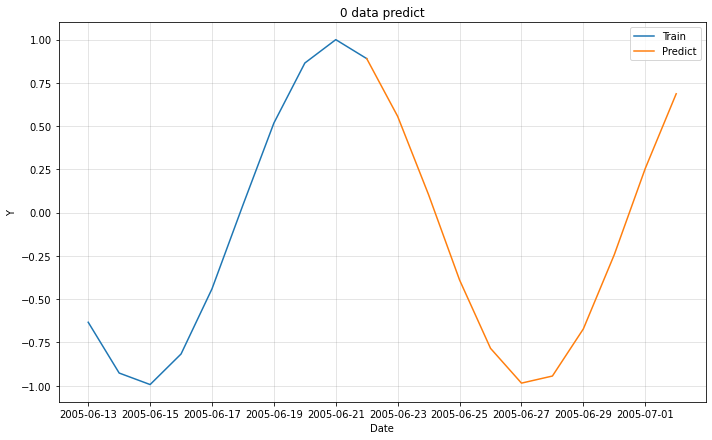

In [33]:
#plot prediction
fost.plot(res, lookback_size=lookahead)